In [1]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 설정 (Matplotlib에서 한글 깨짐 방지)
import matplotlib.pyplot as plt

plt.rc("font", family="NanumGothic")  # Windows 사용자의 경우

# 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

# 기본 라이브러리
import polars as pl
import pandas as pd
import seaborn as sns
import numpy as np

# 시각화용 색상 팔레트
color_palette = sns.color_palette("Set2", as_cmap=False)

In [2]:
df = pl.read_csv('./dataset/CUSTOMER_SCORE_금리.csv')
클러스터링결과 = pl.read_csv('./dataset/클러스터링결과_전체_kmeans_db_6.csv')
customer_agg = pl.read_csv('./dataset/customer_agg.csv')

In [3]:
df

고객ID,기준년월,연령대,성별,고객등급,입출금예금,기타예금,비이자상품,카드,대출,기준금리,보유상품수,거래기간(개월),총점수
i64,i64,i64,str,str,i64,i64,i64,i64,i64,f64,i64,i64,f64
9999998161,202106,60,"""여""","""일반등급""",11000000,0,0,60000,0,4.55,2,6,1040.533333
9999997589,202106,60,"""남""","""일반등급""",0,10400000,0,0,0,4.55,2,6,436.0
9999991579,202106,60,"""여""","""일반등급""",0,30000000,0,0,0,4.55,1,6,1210.0
9999989448,202106,60,"""남""","""일반등급""",400000,0,0,0,0,4.55,1,6,42.0
9999988325,202106,60,"""남""","""일반등급""",2700000,0,0,0,0,4.55,1,6,178.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…
2000384629,202312,60,"""남""","""일반등급""",0,0,0,0,100000,9.18,1,1,17.991667
2000380811,202312,30,"""남""","""일반등급""",0,0,0,0,100000,9.18,1,1,17.991667
2000379801,202312,20,"""여""","""일반등급""",0,0,0,0,100000,9.18,1,1,17.991667


In [5]:
customer_agg

고객ID,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출,평균_총점수,거래기간(개월),연령대,최대_보유상품종류,평균_보유상품종류
i64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64
3527493725,35483.870968,6451.612903,0.0,0.0,0.0,21.010753,36,30,2,0
5825588873,380645.16129,0.0,0.0,53548.387097,0.0,67.584946,36,20,2,1
7628291031,1.5774e6,0.0,0.0,2.0223e6,0.0,510.668817,36,40,2,2
2746476445,1.0579e6,0.0,0.0,0.0,447368.421053,268.427632,22,40,2,1
7089451750,1.0935e6,0.0,0.0,117096.774194,0.0,137.152688,36,40,2,1
…,…,…,…,…,…,…,…,…,…,…
7677297181,1.6774e6,0.0,0.0,308709.677419,0.0,221.202151,36,50,2,2
8483897090,8.1516e6,1.1065e7,0.0,72258.064516,0.0,1089.249462,36,60,4,3
7090476892,6.4903e6,1.4377e7,0.0,388709.677419,0.0,1232.055914,36,40,4,4


In [6]:
클러스터링결과

고객ID,연령대,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출,평균_보유상품종류,KMeans_DB_거리기반
i64,i64,f64,f64,f64,f64,f64,i64,i64
3527493725,30,35483.870968,6451.612903,0.0,0.0,0.0,0,1
5825588873,20,380645.16129,0.0,0.0,53548.387097,0.0,1,1
7628291031,40,1.5774e6,0.0,0.0,2.0223e6,0.0,2,1
2746476445,40,1.0579e6,0.0,0.0,0.0,447368.421053,1,1
7089451750,40,1.0935e6,0.0,0.0,117096.774194,0.0,1,1
…,…,…,…,…,…,…,…,…
7677297181,50,1.6774e6,0.0,0.0,308709.677419,0.0,2,1
8483897090,60,8.1516e6,1.1065e7,0.0,72258.064516,0.0,3,4
7090476892,40,6.4903e6,1.4377e7,0.0,388709.677419,0.0,4,0


In [7]:
클러스터링결과['KMeans_DB_거리기반'].value_counts()

KMeans_DB_거리기반,count
i64,u32
3,31433
0,82990
1,1619255
2,61942
5,26586
4,156487


In [12]:
target = 클러스터링결과[['고객ID', 'KMeans_DB_거리기반']]

In [13]:
target

고객ID,KMeans_DB_거리기반
i64,i64
3527493725,1
5825588873,1
7628291031,1
2746476445,1
7089451750,1
…,…
7677297181,1
8483897090,4
7090476892,0


In [14]:
# 고객ID 기준 left join
# left join: customer_agg를 기준으로 target을 병합
customer_agg_kmeans_db_거리_6 = customer_agg.join(
    target, on="고객ID", how="left"
)

In [15]:
customer_agg_kmeans_db_거리_6

고객ID,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출,평균_총점수,거래기간(개월),연령대,최대_보유상품종류,평균_보유상품종류,KMeans_DB_거리기반
i64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64
3527493725,35483.870968,6451.612903,0.0,0.0,0.0,21.010753,36,30,2,0,1
5825588873,380645.16129,0.0,0.0,53548.387097,0.0,67.584946,36,20,2,1,1
7628291031,1.5774e6,0.0,0.0,2.0223e6,0.0,510.668817,36,40,2,2,1
2746476445,1.0579e6,0.0,0.0,0.0,447368.421053,268.427632,22,40,2,1,1
7089451750,1.0935e6,0.0,0.0,117096.774194,0.0,137.152688,36,40,2,1,1
…,…,…,…,…,…,…,…,…,…,…,…
7677297181,1.6774e6,0.0,0.0,308709.677419,0.0,221.202151,36,50,2,2,1
8483897090,8.1516e6,1.1065e7,0.0,72258.064516,0.0,1089.249462,36,60,4,3,4
7090476892,6.4903e6,1.4377e7,0.0,388709.677419,0.0,1232.055914,36,40,4,4,0


In [19]:
customer_agg_kmeans_db_거리_6.write_csv('./dataset/customer_agg_kmeans_db_거리_6.csv')

In [16]:
customer_agg_kmeans_db_거리_6.describe()

statistic,고객ID,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출,평균_총점수,거래기간(개월),연령대,최대_보유상품종류,평균_보유상품종류,KMeans_DB_거리기반
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1.978693e6,1.978693e6,1.978693e6,1.978693e6,1.978693e6,1.978693e6,1.978693e6,1.978693e6,1.978693e6,1.978693e6,1.978693e6,1.978693e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",5.9962e9,3.0709e6,2.6716e6,156457.756266,141267.836559,2.5459e6,1336.639341,32.824214,41.132475,1.952424,1.399118,1.312137
"""std""",2.3083e9,6.9741e6,9.1386e6,2.1488e6,374575.86566,9.9298e6,3813.460295,8.432045,15.895499,1.013677,0.986794,0.98291
"""min""",2.0004e9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0,0.0,0.0
"""25%""",4.0012e9,68750.0,0.0,0.0,0.0,0.0,57.548387,36.0,30.0,1.0,1.0,1.0
"""50%""",5.9888e9,535483.870968,0.0,0.0,0.0,0.0,215.886022,36.0,40.0,2.0,1.0,1.0
"""75%""",7.9953e9,2.8290e6,441935.483871,0.0,98709.677419,0.0,774.335484,36.0,60.0,3.0,2.0,1.0
"""max""",1.0000e10,1.855e8,1.84e8,9.9e7,3.29e7,9.9e7,47154.016667,36.0,60.0,7.0,7.0,5.0


In [22]:
# 클러스터별 요약 통계
summary_customer_agg_kmeans_db_거리_6 = customer_agg_kmeans_db_거리_6.group_by("KMeans_DB_거리기반").agg([
    pl.count().alias("고객수"),
    pl.col("평균_입출금예금").mean().alias("평균_입출금예금"),
    pl.col("평균_기타예금").mean().alias("평균_기타예금"),
    pl.col("평균_비이자상품").mean().alias("평균_비이자상품"),
    pl.col("평균_카드").mean().alias("평균_카드"),
    pl.col("평균_대출").mean().alias("평균_대출"),
    pl.col("평균_총점수").mean().alias("평균_총점수"),
    pl.col("평균_총점수").median().alias("중앙값_총점수"),
    pl.col("거래기간(개월)").mean().alias("평균_거래기간(개월)"),
    pl.col("연령대").mean().alias("평균_연령대"),
    pl.col("최대_보유상품종류").mean().alias("평균_최대_보유상품종류"),
    pl.col("평균_보유상품종류").mean().round(0).cast(pl.Int8).alias("평균_보유상품종류")
    
])

In [23]:
summary_customer_agg_kmeans_db_거리_6

KMeans_DB_거리기반,고객수,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출,평균_총점수,중앙값_총점수,평균_거래기간(개월),평균_연령대,평균_최대_보유상품종류,평균_보유상품종류
i64,u32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i8
0,82990,5.8479e6,2.2986e7,500045.973994,224934.457107,492063.942328,1681.659073,1387.063934,34.720376,49.140499,3.307844,3
3,31433,1.0382e7,5.8699e7,931733.688384,277464.329062,755711.72049,3508.670226,2987.849462,31.58359,52.0628,3.436484,3
4,156487,1.3376e7,2.0630e6,496342.530044,300045.051961,1.1095e6,1710.025562,1193.817204,35.232991,48.628896,2.416731,2
1,1619255,1.0732e6,588032.930364,69357.203216,105392.232433,987573.071319,519.497843,137.535484,32.736063,39.509583,1.765968,1
5,26586,4.4347e7,6.3876e6,1.2635e6,479144.043879,1.6460e6,4535.875768,3721.505376,33.02806,49.156699,2.656812,2
2,61942,4.1143e6,1.4318e6,245825.481418,351752.600004,5.0957e7,18817.005384,16971.636868,27.0448,44.898776,2.782232,2


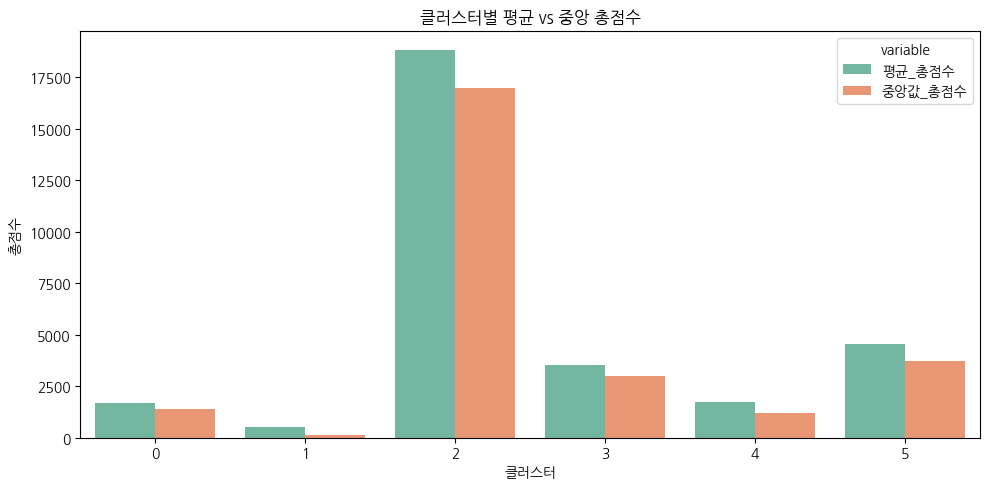

In [24]:
# Pandas 변환
summary_pd = summary_customer_agg_kmeans_db_거리_6.sort("KMeans_DB_거리기반").to_pandas()

plt.figure(figsize=(10, 5))
sns.barplot(
    data=summary_pd.melt(id_vars="KMeans_DB_거리기반", value_vars=["평균_총점수", "중앙값_총점수"]),
    x="KMeans_DB_거리기반", y="value", hue="variable", palette="Set2"
)
plt.title("클러스터별 평균 vs 중앙 총점수")
plt.xlabel("클러스터")
plt.ylabel("총점수")
plt.tight_layout()
plt.show()

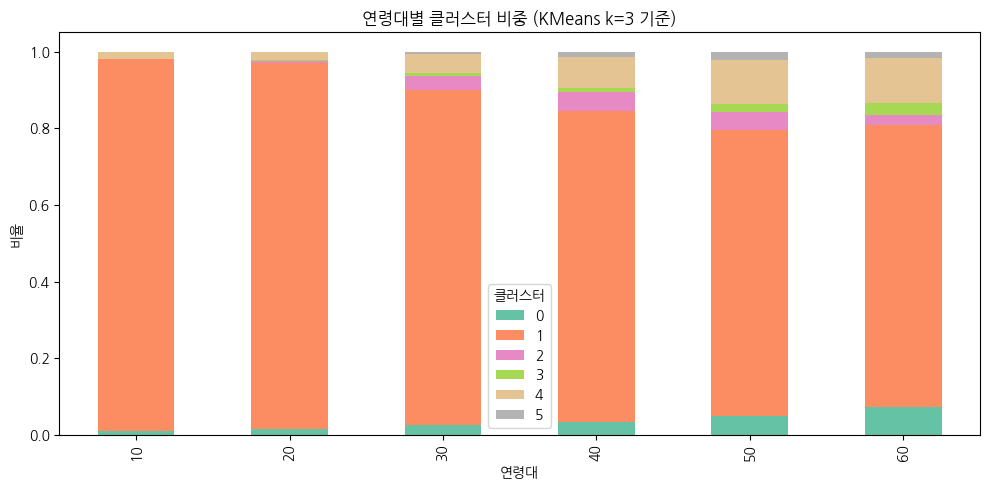

In [27]:
# 그룹별 count 계산 후 pivot
age_cluster = customer_agg_kmeans_db_거리_6.group_by(["연령대", "KMeans_DB_거리기반"]).count().to_pandas()
pivot = age_cluster.pivot(index="연령대", columns="KMeans_DB_거리기반", values="count").fillna(0)

# 비율로 변환
pivot_ratio = pivot.div(pivot.sum(axis=1), axis=0)

# 누적 막대그래프
pivot_ratio.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="Set2")
plt.title("연령대별 클러스터 비중 (KMeans k=3 기준)")
plt.ylabel("비율")
plt.xlabel("연령대")
plt.legend(title="클러스터")
plt.tight_layout()
plt.show()

In [28]:
pivot_ratio

KMeans_DB_거리기반,0,1,2,3,4,5
연령대,,,,,,
10,0.010006,0.969630,0.000018,0.000360,0.019194,0.000792
20,0.016096,0.952814,0.007369,0.002025,0.019841,0.001854
30,0.025369,0.873991,0.036935,0.006775,0.049148,0.007781
40,0.033812,0.811899,0.047990,0.012035,0.079089,0.015174
50,0.049298,0.746064,0.046643,0.020459,0.115147,0.022390
60,0.072268,0.736590,0.026177,0.031167,0.115616,0.018181


In [30]:
summary_customer_agg_kmeans_db_거리_6

KMeans_DB_거리기반,고객수,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출,평균_총점수,중앙값_총점수,평균_거래기간(개월),평균_연령대,평균_최대_보유상품종류,평균_보유상품종류
i64,u32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i8
0,82990,5.8479e6,2.2986e7,500045.973994,224934.457107,492063.942328,1681.659073,1387.063934,34.720376,49.140499,3.307844,3
3,31433,1.0382e7,5.8699e7,931733.688384,277464.329062,755711.72049,3508.670226,2987.849462,31.58359,52.0628,3.436484,3
4,156487,1.3376e7,2.0630e6,496342.530044,300045.051961,1.1095e6,1710.025562,1193.817204,35.232991,48.628896,2.416731,2
1,1619255,1.0732e6,588032.930364,69357.203216,105392.232433,987573.071319,519.497843,137.535484,32.736063,39.509583,1.765968,1
5,26586,4.4347e7,6.3876e6,1.2635e6,479144.043879,1.6460e6,4535.875768,3721.505376,33.02806,49.156699,2.656812,2
2,61942,4.1143e6,1.4318e6,245825.481418,351752.600004,5.0957e7,18817.005384,16971.636868,27.0448,44.898776,2.782232,2


In [34]:
# 2. 충성도, 상품 형태 분류 함수 정의
def classify(row):
    loyalty = (
        "충성도 낮음" if row["평균_총점수"] < 600 else
        "충성도 중간" if row["평균_총점수"] < 10000 else
        "충성도 높음"
    )
    product = (
        "단일 상품 보유" if row["평균_보유상품종류"] < 2 else
        "복수 상품 보유" if row["평균_보유상품종류"] < 3  else
        "상품 다수 보유"
    )
    return loyalty, product

# 3. Pandas 변환 후 전략 문장 생성
df_pd = summary_customer_agg_kmeans_db_거리_6.to_pandas()
df_pd["충성도 수준"], df_pd["상품 보유 형태"] = zip(*df_pd.apply(classify, axis=1))
df_pd["추천 전략"] = df_pd.apply(
    lambda row: f"{row['충성도 수준']} & {row['상품 보유 형태']} 고객군으로, "
                f"{'락인 전략 강화 필요' if '낮음' in row['충성도 수준'] else '혜택 기반 유지 전략 추천'}",
    axis=1
)

# 4. PPT용 표 구성
ppt_table = df_pd[[
    "KMeans_DB_거리기반","평균_연령대", "고객수", "평균_총점수", "평균_보유상품종류",
    "충성도 수준", "상품 보유 형태", "추천 전략"
]]


In [35]:
ppt_table

,KMeans_DB_거리기반,평균_연령대,고객수,평균_총점수,평균_보유상품종류,충성도 수준,상품 보유 형태,추천 전략
0,0,49.140499,82990,1681.659073,3,충성도 중간,상품 다수 보유,"충성도 중간 & 상품 다수 보유 고객군으로, 혜택 기반 유지 전략 추천"
1,3,52.062800,31433,3508.670226,3,충성도 중간,상품 다수 보유,"충성도 중간 & 상품 다수 보유 고객군으로, 혜택 기반 유지 전략 추천"
2,4,48.628896,156487,1710.025562,2,충성도 중간,복수 상품 보유,"충성도 중간 & 복수 상품 보유 고객군으로, 혜택 기반 유지 전략 추천"
3,1,39.509583,1619255,519.497843,1,충성도 낮음,단일 상품 보유,"충성도 낮음 & 단일 상품 보유 고객군으로, 락인 전략 강화 필요"
4,5,49.156699,26586,4535.875768,2,충성도 중간,복수 상품 보유,"충성도 중간 & 복수 상품 보유 고객군으로, 혜택 기반 유지 전략 추천"
5,2,44.898776,61942,18817.005384,2,충성도 높음,복수 상품 보유,"충성도 높음 & 복수 상품 보유 고객군으로, 혜택 기반 유지 전략 추천"


# 클러스터 잘 나뉘었는 지 요소 확인

## 클러스터별 고객 수 막대그래프

In [38]:
# 클러스터가 잘 나뉘어졌는 지 확인해봐야함!!

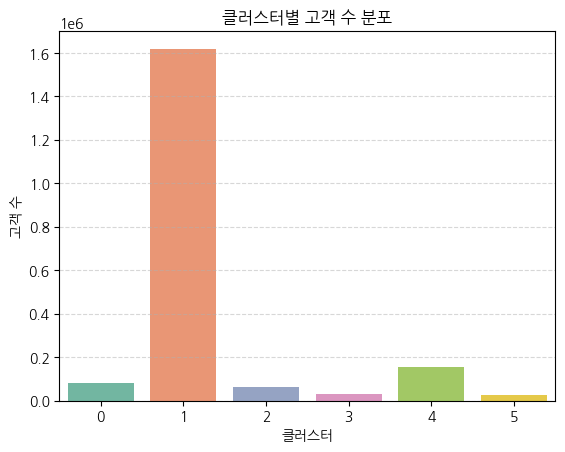

In [37]:
# 전체 클러스터 분포 및 특성 차이 확인
sns.countplot(data=customer_agg_kmeans_db_거리_6.to_pandas(), x="KMeans_DB_거리기반", palette="Set2")
plt.title("클러스터별 고객 수 분포")
plt.xlabel("클러스터")
plt.ylabel("고객 수")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [39]:
customer_agg_kmeans_db_거리_6

고객ID,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출,평균_총점수,거래기간(개월),연령대,최대_보유상품종류,평균_보유상품종류,KMeans_DB_거리기반
i64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64
3527493725,35483.870968,6451.612903,0.0,0.0,0.0,21.010753,36,30,2,0,1
5825588873,380645.16129,0.0,0.0,53548.387097,0.0,67.584946,36,20,2,1,1
7628291031,1.5774e6,0.0,0.0,2.0223e6,0.0,510.668817,36,40,2,2,1
2746476445,1.0579e6,0.0,0.0,0.0,447368.421053,268.427632,22,40,2,1,1
7089451750,1.0935e6,0.0,0.0,117096.774194,0.0,137.152688,36,40,2,1,1
…,…,…,…,…,…,…,…,…,…,…,…
7677297181,1.6774e6,0.0,0.0,308709.677419,0.0,221.202151,36,50,2,2,1
8483897090,8.1516e6,1.1065e7,0.0,72258.064516,0.0,1089.249462,36,60,4,3,4
7090476892,6.4903e6,1.4377e7,0.0,388709.677419,0.0,1232.055914,36,40,4,4,0


## 클러스터별 요소 boxplot

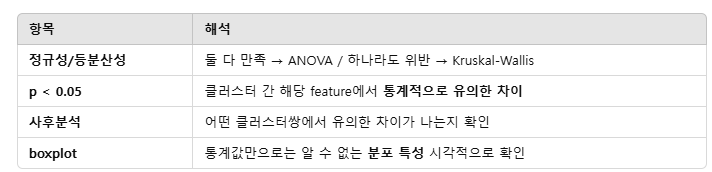

In [41]:
!pip install scikit-posthocs


📊 평균_입출금예금 - 클러스터별 유의성 분석
🔎 정규성: ❌ X | 등분산성: ❌ X

📊 평균_입출금예금 - Kruskal-Wallis 결과
→ 통계량: 598579.6663, p-value: 0.0000
✅ 클러스터 간 유의미한 차이가 있습니다.

📊 사후분석 (Dunn’s Test, Bonferroni 조정):
🔹 p-value Matrix:
               0    1    2              3              4              5
0   1.000000e+00  0.0  0.0  4.770657e-163   0.000000e+00   0.000000e+00
1   0.000000e+00  1.0  0.0   0.000000e+00   0.000000e+00   0.000000e+00
2   0.000000e+00  0.0  1.0   0.000000e+00   0.000000e+00   0.000000e+00
3  4.770657e-163  0.0  0.0   1.000000e+00   0.000000e+00   0.000000e+00
4   0.000000e+00  0.0  0.0   0.000000e+00   1.000000e+00  4.371872e-212
5   0.000000e+00  0.0  0.0   0.000000e+00  4.371872e-212   1.000000e+00

🔹 유의미한 차이 여부 (p < 0.05):
       0      1      2      3      4      5
0  False   True   True   True   True   True
1   True  False   True   True   True   True
2   True   True  False   True   True   True
3   True   True   True  False   True   True
4   True   True   True   True  False   True
5   True

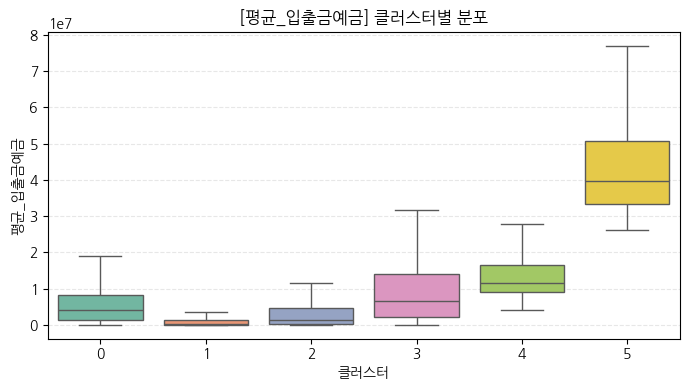


📊 평균_기타예금 - 클러스터별 유의성 분석
🔎 정규성: ❌ X | 등분산성: ❌ X

📊 평균_기타예금 - Kruskal-Wallis 결과
→ 통계량: 505409.2261, p-value: 0.0000
✅ 클러스터 간 유의미한 차이가 있습니다.

📊 사후분석 (Dunn’s Test, Bonferroni 조정):
🔹 p-value Matrix:
              0             1             2             3              4  \
0  1.000000e+00  0.000000e+00  0.000000e+00  8.728214e-83   0.000000e+00   
1  0.000000e+00  1.000000e+00  2.209564e-95  0.000000e+00   0.000000e+00   
2  0.000000e+00  2.209564e-95  1.000000e+00  0.000000e+00   0.000000e+00   
3  8.728214e-83  0.000000e+00  0.000000e+00  1.000000e+00   0.000000e+00   
4  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   1.000000e+00   
5  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.709876e-288   

               5  
0   0.000000e+00  
1   0.000000e+00  
2   0.000000e+00  
3   0.000000e+00  
4  2.709876e-288  
5   1.000000e+00  

🔹 유의미한 차이 여부 (p < 0.05):
       0      1      2      3      4      5
0  False   True   True   True   True   True
1   True  False   True  

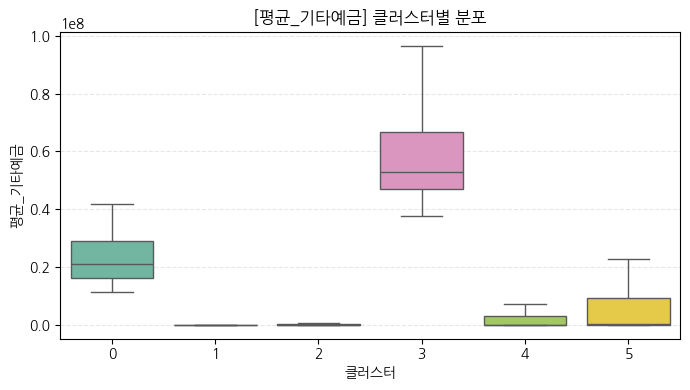


📊 평균_비이자상품 - 클러스터별 유의성 분석
🔎 정규성: ❌ X | 등분산성: ❌ X

📊 평균_비이자상품 - Kruskal-Wallis 결과
→ 통계량: 28606.0880, p-value: 0.0000
✅ 클러스터 간 유의미한 차이가 있습니다.

📊 사후분석 (Dunn’s Test, Bonferroni 조정):
🔹 p-value Matrix:
               0    1              2              3              4  \
0   1.000000e+00  0.0  3.434322e-240  1.570049e-149   1.285942e-81   
1   0.000000e+00  1.0   0.000000e+00   0.000000e+00   0.000000e+00   
2  3.434322e-240  0.0   1.000000e+00   0.000000e+00   5.471491e-85   
3  1.570049e-149  0.0   0.000000e+00   1.000000e+00   0.000000e+00   
4   1.285942e-81  0.0   5.471491e-85   0.000000e+00   1.000000e+00   
5   3.929010e-63  0.0   0.000000e+00   1.539496e-09  1.110576e-202   

               5  
0   3.929010e-63  
1   0.000000e+00  
2   0.000000e+00  
3   1.539496e-09  
4  1.110576e-202  
5   1.000000e+00  

🔹 유의미한 차이 여부 (p < 0.05):
       0      1      2      3      4      5
0  False   True   True   True   True   True
1   True  False   True   True   True   True
2   True   True  Fals

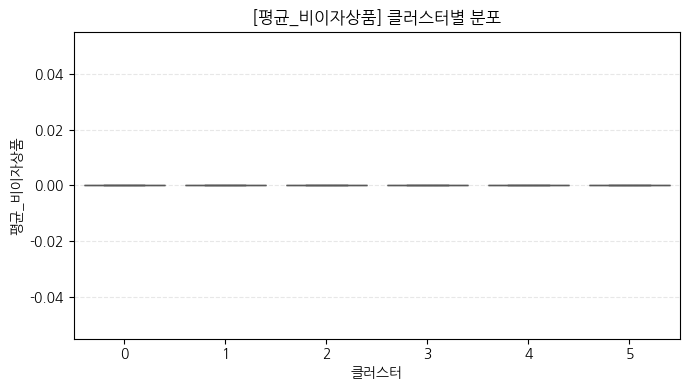


📊 평균_카드 - 클러스터별 유의성 분석
🔎 정규성: ❌ X | 등분산성: ❌ X

📊 평균_카드 - Kruskal-Wallis 결과
→ 통계량: 86794.1201, p-value: 0.0000
✅ 클러스터 간 유의미한 차이가 있습니다.

📊 사후분석 (Dunn’s Test, Bonferroni 조정):
🔹 p-value Matrix:
               0    1              2              3              4  \
0   1.000000e+00  0.0   2.442824e-01   4.861428e-30  3.517362e-294   
1   0.000000e+00  1.0   0.000000e+00   0.000000e+00   0.000000e+00   
2   2.442824e-01  0.0   1.000000e+00   2.756915e-19  1.168217e-203   
3   4.861428e-30  0.0   2.756915e-19   1.000000e+00   7.614969e-38   
4  3.517362e-294  0.0  1.168217e-203   7.614969e-38   1.000000e+00   
5   0.000000e+00  0.0   0.000000e+00  1.103871e-160  6.329635e-105   

               5  
0   0.000000e+00  
1   0.000000e+00  
2   0.000000e+00  
3  1.103871e-160  
4  6.329635e-105  
5   1.000000e+00  

🔹 유의미한 차이 여부 (p < 0.05):
       0      1      2      3      4      5
0  False   True  False   True   True   True
1   True  False   True   True   True   True
2  False   True  False   Tr

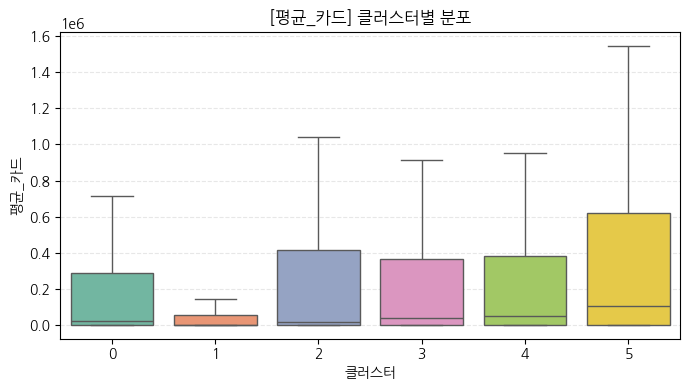


📊 평균_대출 - 클러스터별 유의성 분석
🔎 정규성: ❌ X | 등분산성: ❌ X

📊 평균_대출 - Kruskal-Wallis 결과
→ 통계량: 355787.0266, p-value: 0.0000
✅ 클러스터 간 유의미한 차이가 있습니다.

📊 사후분석 (Dunn’s Test, Bonferroni 조정):
🔹 p-value Matrix:
               0              1    2              3              4  \
0   1.000000e+00   0.000000e+00  0.0   1.401858e-01  1.988327e-191   
1   0.000000e+00   1.000000e+00  0.0   0.000000e+00   0.000000e+00   
2   0.000000e+00   0.000000e+00  1.0   0.000000e+00   0.000000e+00   
3   1.401858e-01   0.000000e+00  0.0   1.000000e+00  1.960400e-119   
4  1.988327e-191   0.000000e+00  0.0  1.960400e-119   1.000000e+00   
5   2.064270e-76  2.775671e-149  0.0   5.604011e-70   1.000000e+00   

               5  
0   2.064270e-76  
1  2.775671e-149  
2   0.000000e+00  
3   5.604011e-70  
4   1.000000e+00  
5   1.000000e+00  

🔹 유의미한 차이 여부 (p < 0.05):
       0      1      2      3      4      5
0  False   True   True  False   True   True
1   True  False   True   True   True   True
2   True   True  False   T

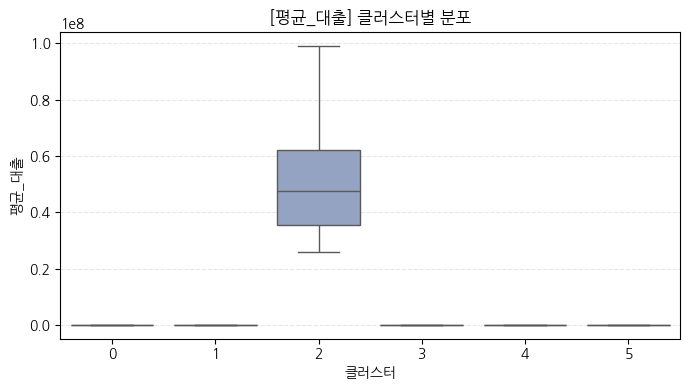


📊 평균_총점수 - 클러스터별 유의성 분석
🔎 정규성: ❌ X | 등분산성: ❌ X

📊 평균_총점수 - Kruskal-Wallis 결과
→ 통계량: 708132.7986, p-value: 0.0000
✅ 클러스터 간 유의미한 차이가 있습니다.

📊 사후분석 (Dunn’s Test, Bonferroni 조정):
🔹 p-value Matrix:
              0    1              2             3             4              5
0  1.000000e+00  0.0   0.000000e+00  0.000000e+00  4.656636e-09   0.000000e+00
1  0.000000e+00  1.0   0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00
2  0.000000e+00  0.0   1.000000e+00  0.000000e+00  0.000000e+00  8.130324e-169
3  0.000000e+00  0.0   0.000000e+00  1.000000e+00  0.000000e+00   9.452349e-14
4  4.656636e-09  0.0   0.000000e+00  0.000000e+00  1.000000e+00   0.000000e+00
5  0.000000e+00  0.0  8.130324e-169  9.452349e-14  0.000000e+00   1.000000e+00

🔹 유의미한 차이 여부 (p < 0.05):
       0      1      2      3      4      5
0  False   True   True   True   True   True
1   True  False   True   True   True   True
2   True   True  False   True   True   True
3   True   True   True  False   True   True
4   Tru

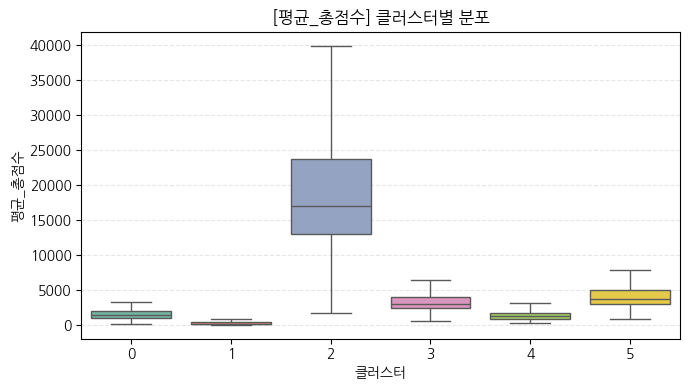


📊 거래기간(개월) - 클러스터별 유의성 분석
🔎 정규성: ❌ X | 등분산성: ❌ X

📊 거래기간(개월) - Kruskal-Wallis 결과
→ 통계량: 53032.3659, p-value: 0.0000
✅ 클러스터 간 유의미한 차이가 있습니다.

📊 사후분석 (Dunn’s Test, Bonferroni 조정):
🔹 p-value Matrix:
              0             1    2             3             4             5
0  1.000000e+00  0.000000e+00  0.0  0.000000e+00  7.231490e-46  0.000000e+00
1  0.000000e+00  1.000000e+00  0.0  0.000000e+00  0.000000e+00  4.248673e-52
2  0.000000e+00  0.000000e+00  1.0  0.000000e+00  0.000000e+00  0.000000e+00
3  0.000000e+00  0.000000e+00  0.0  1.000000e+00  0.000000e+00  8.951044e-73
4  7.231490e-46  0.000000e+00  0.0  0.000000e+00  1.000000e+00  0.000000e+00
5  0.000000e+00  4.248673e-52  0.0  8.951044e-73  0.000000e+00  1.000000e+00

🔹 유의미한 차이 여부 (p < 0.05):
       0      1      2      3      4      5
0  False   True   True   True   True   True
1   True  False   True   True   True   True
2   True   True  False   True   True   True
3   True   True   True  False   True   True
4   True   True   

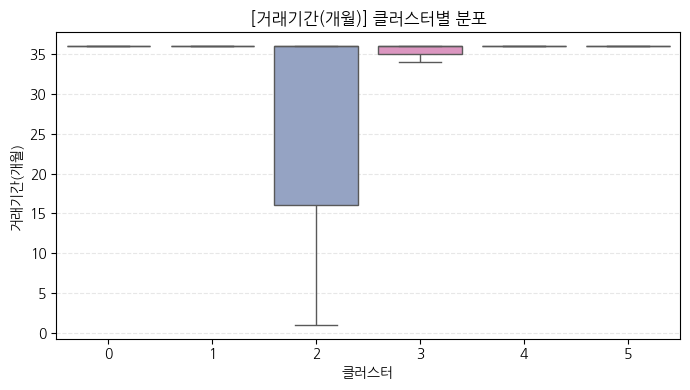


📊 연령대 - 클러스터별 유의성 분석
🔎 정규성: ❌ X | 등분산성: ❌ X

📊 연령대 - Kruskal-Wallis 결과
→ 통계량: 95888.2364, p-value: 0.0000
✅ 클러스터 간 유의미한 차이가 있습니다.

📊 사후분석 (Dunn’s Test, Bonferroni 조정):
🔹 p-value Matrix:
               0    1    2              3             4              5
0   1.000000e+00  0.0  0.0  1.481702e-173  1.181886e-28   1.232611e-03
1   0.000000e+00  1.0  0.0   0.000000e+00  0.000000e+00   0.000000e+00
2   0.000000e+00  0.0  1.0   0.000000e+00  0.000000e+00   0.000000e+00
3  1.481702e-173  0.0  0.0   1.000000e+00  0.000000e+00  7.967685e-145
4   1.181886e-28  0.0  0.0   0.000000e+00  1.000000e+00   2.363663e-02
5   1.232611e-03  0.0  0.0  7.967685e-145  2.363663e-02   1.000000e+00

🔹 유의미한 차이 여부 (p < 0.05):
       0      1      2      3      4      5
0  False   True   True   True   True   True
1   True  False   True   True   True   True
2   True   True  False   True   True   True
3   True   True   True  False   True   True
4   True   True   True   True  False   True
5   True   True   True   T

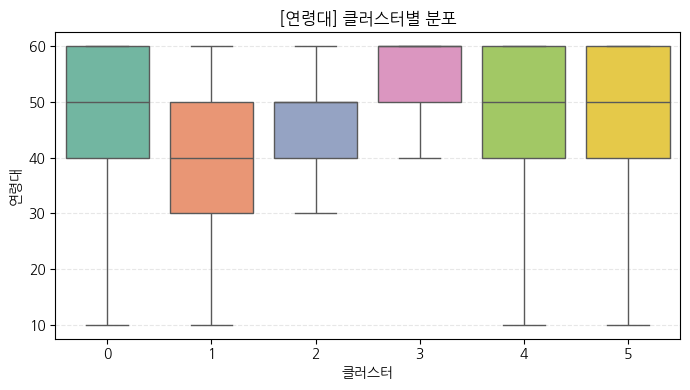


📊 최대_보유상품종류 - 클러스터별 유의성 분석
🔎 정규성: ❌ X | 등분산성: ❌ X

📊 최대_보유상품종류 - Kruskal-Wallis 결과
→ 통계량: 279709.0418, p-value: 0.0000
✅ 클러스터 간 유의미한 차이가 있습니다.

📊 사후분석 (Dunn’s Test, Bonferroni 조정):
🔹 p-value Matrix:
              0    1             2             3              4              5
0  1.000000e+00  0.0  0.000000e+00  1.054622e-12   0.000000e+00   0.000000e+00
1  0.000000e+00  1.0  0.000000e+00  0.000000e+00   0.000000e+00   0.000000e+00
2  0.000000e+00  0.0  1.000000e+00  0.000000e+00   0.000000e+00   4.226284e-50
3  1.054622e-12  0.0  0.000000e+00  1.000000e+00   0.000000e+00   0.000000e+00
4  0.000000e+00  0.0  0.000000e+00  0.000000e+00   1.000000e+00  2.673169e-152
5  0.000000e+00  0.0  4.226284e-50  0.000000e+00  2.673169e-152   1.000000e+00

🔹 유의미한 차이 여부 (p < 0.05):
       0      1      2      3      4      5
0  False   True   True   True   True   True
1   True  False   True   True   True   True
2   True   True  False   True   True   True
3   True   True   True  False   True   True
4

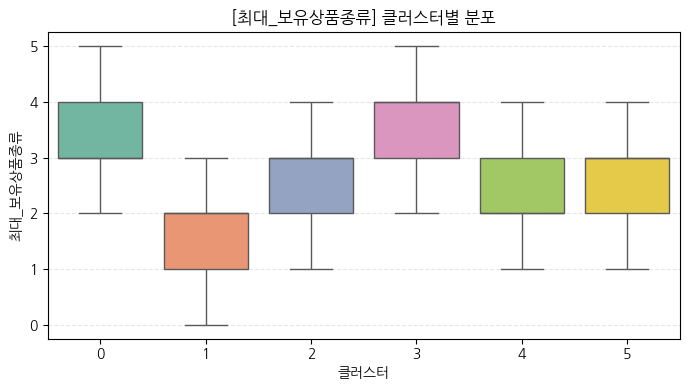


📊 평균_보유상품종류 - 클러스터별 유의성 분석
🔎 정규성: ❌ X | 등분산성: ❌ X

📊 평균_보유상품종류 - Kruskal-Wallis 결과
→ 통계량: 334019.1311, p-value: 0.0000
✅ 클러스터 간 유의미한 차이가 있습니다.

📊 사후분석 (Dunn’s Test, Bonferroni 조정):
🔹 p-value Matrix:
               0    1             2              3              4  \
0   1.000000e+00  0.0  0.000000e+00  2.524738e-230   0.000000e+00   
1   0.000000e+00  1.0  0.000000e+00   0.000000e+00   0.000000e+00   
2   0.000000e+00  0.0  1.000000e+00   0.000000e+00   0.000000e+00   
3  2.524738e-230  0.0  0.000000e+00   1.000000e+00   0.000000e+00   
4   0.000000e+00  0.0  0.000000e+00   0.000000e+00   1.000000e+00   
5   0.000000e+00  0.0  2.925366e-81   0.000000e+00  1.326637e-179   

               5  
0   0.000000e+00  
1   0.000000e+00  
2   2.925366e-81  
3   0.000000e+00  
4  1.326637e-179  
5   1.000000e+00  

🔹 유의미한 차이 여부 (p < 0.05):
       0      1      2      3      4      5
0  False   True   True   True   True   True
1   True  False   True   True   True   True
2   True   True  False   

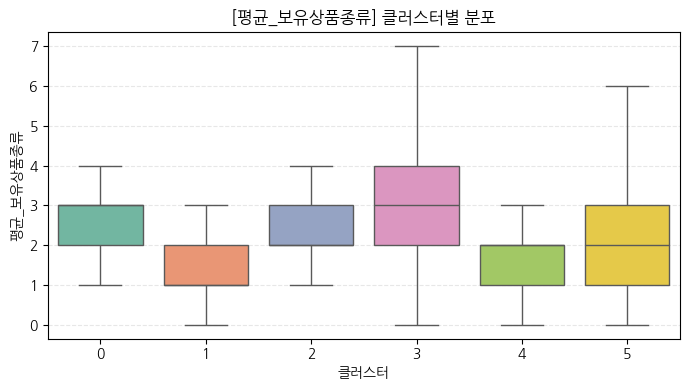

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal, shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp
import warnings
warnings.filterwarnings('ignore')

# 분석 대상 DataFrame
df = customer_agg_kmeans_db_거리_6.to_pandas()

# 변수 리스트
features = [
    "평균_입출금예금", "평균_기타예금", "평균_비이자상품", 
    "평균_카드", "평균_대출", "평균_총점수", "거래기간(개월)",
    "연령대", "최대_보유상품종류", "평균_보유상품종류"
]

cluster_col = "KMeans_DB_거리기반"

# ✅ 분석 반복
for feature in features:
    print("\n" + "=" * 70)
    print(f"📊 {feature} - 클러스터별 유의성 분석")
    print("=" * 70)

    # ------------------------------
    # ✅ 클러스터별 그룹 데이터
    group_values = [group[feature].dropna().values for name, group in df.groupby(cluster_col)]

    # ✅ 정규성 + 등분산성 체크
    normal = all(shapiro(g)[1] > 0.05 for g in group_values)
    equal_var = levene(*group_values)[1] > 0.05

    print(f"🔎 정규성: {'✅ 충족' if normal else '❌ X'} | 등분산성: {'✅ 충족' if equal_var else '❌ X'}")

    # ------------------------------
    # ✅ 유의성 검정
    if normal and equal_var:
        stat, p = f_oneway(*group_values)
        test_name = "ANOVA"
    else:
        stat, p = kruskal(*group_values)
        test_name = "Kruskal-Wallis"

    print(f"\n📊 {feature} - {test_name} 결과")
    print(f"→ 통계량: {stat:.4f}, p-value: {p:.4f}")

    if p < 0.05:
        print("✅ 클러스터 간 유의미한 차이가 있습니다.")

        # ✅ 사후분석
        if test_name == "ANOVA":
            print("\n🔍 사후분석 (Tukey HSD):")
            tukey_result = pairwise_tukeyhsd(endog=df[feature], groups=df[cluster_col], alpha=0.05)
            tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
            tukey_df["유의미한 차이"] = tukey_df["p-adj"] < 0.05  # True/False 추가
            print(tukey_df)
        else:
            print("\n📊 사후분석 (Dunn’s Test, Bonferroni 조정):")
            dunn_result = sp.posthoc_dunn(df, val_col=feature, group_col=cluster_col, p_adjust='bonferroni')
            dunn_bool = dunn_result < 0.05  # True/False 추가
            print("🔹 p-value Matrix:")
            print(dunn_result)
            print("\n🔹 유의미한 차이 여부 (p < 0.05):")
            print(dunn_bool)

    else:
        print("⚠️ 클러스터 간 유의미한 차이가 없습니다.")

    print("-" * 70)

    # ------------------------------
    # ✅ 박스플롯 시각화
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df, x=cluster_col, y=feature, palette="Set2", showfliers=False)
    plt.title(f"[{feature}] 클러스터별 분포")
    plt.xlabel("클러스터")
    plt.ylabel(feature)
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


## 클러스터 내 2030 boxplot

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal, shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp
import warnings
warnings.filterwarnings('ignore')

In [44]:
# ✅ 분석 대상: 2030세대 필터링
df = customer_agg_kmeans_db_거리_6.to_pandas()
df_2030 = df[(df["연령대"] >= 20) & (df["연령대"] < 40)].copy()

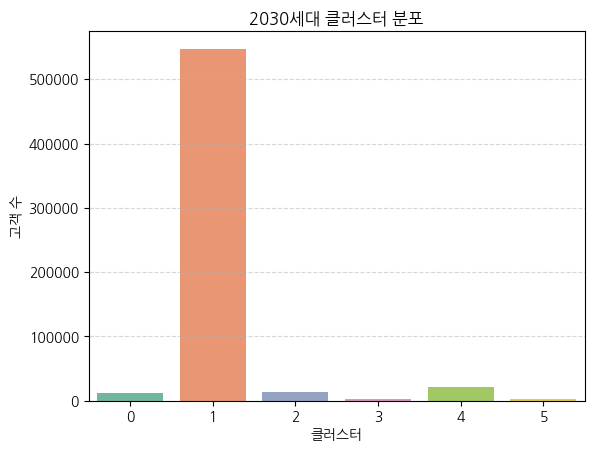

In [46]:
# 2030세대의 클러스터 차이 분석
# 2030 필터링 (20~39세)
df = customer_agg_kmeans_db_거리_6.to_pandas()
df_2030 = df[(df["연령대"] >= 20) & (df["연령대"] < 40)]

# 클러스터별 분포 확인
sns.countplot(data=df_2030, x="KMeans_DB_거리기반", palette="Set2")
plt.title("2030세대 클러스터 분포")
plt.xlabel("클러스터")
plt.ylabel("고객 수")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


📊 [2030세대] 평균_입출금예금 - 클러스터별 유의성 분석
🔎 정규성: ❌ X | 등분산성: ❌ X

📊 평균_입출금예금 - Kruskal-Wallis 결과
→ 통계량: 83241.3896, p-value: 0.0000
✅ 클러스터 간 유의미한 차이가 있습니다.

📊 사후분석 (Dunn’s Test, Bonferroni 조정):
🔹 p-value Matrix:
          0             1             2              3              4  \
0  1.000000  0.000000e+00  0.000000e+00   6.362658e-05   0.000000e+00   
1  0.000000  1.000000e+00  5.429610e-79   0.000000e+00   0.000000e+00   
2  0.000000  5.429610e-79  1.000000e+00   0.000000e+00   0.000000e+00   
3  0.000064  0.000000e+00  0.000000e+00   1.000000e+00  4.163909e-212   
4  0.000000  0.000000e+00  0.000000e+00  4.163909e-212   1.000000e+00   
5  0.000000  0.000000e+00  0.000000e+00  5.711052e-159   5.828630e-04   

               5  
0   0.000000e+00  
1   0.000000e+00  
2   0.000000e+00  
3  5.711052e-159  
4   5.828630e-04  
5   1.000000e+00  

🔹 유의미한 차이 여부 (p < 0.05):
       0      1      2      3      4      5
0  False   True   True   True   True   True
1   True  False   True   True   Tru

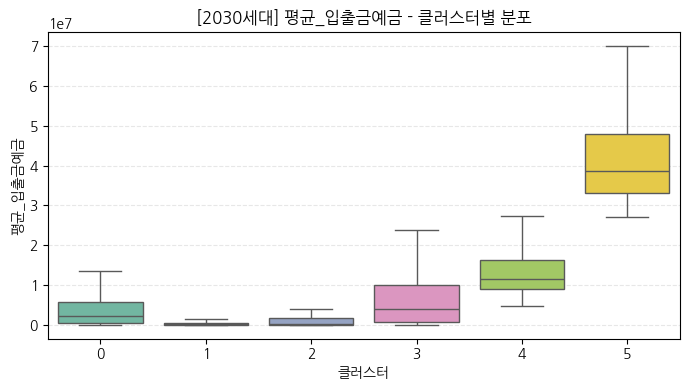


📊 [2030세대] 평균_기타예금 - 클러스터별 유의성 분석
🔎 정규성: ❌ X | 등분산성: ❌ X

📊 평균_기타예금 - Kruskal-Wallis 결과
→ 통계량: 75030.4304, p-value: 0.0000
✅ 클러스터 간 유의미한 차이가 있습니다.

📊 사후분석 (Dunn’s Test, Bonferroni 조정):
🔹 p-value Matrix:
          0             1             2         3             4             5
0  1.000000  0.000000e+00  0.000000e+00  0.118822  0.000000e+00  0.000000e+00
1  0.000000  1.000000e+00  5.240986e-62  0.000000  0.000000e+00  0.000000e+00
2  0.000000  5.240986e-62  1.000000e+00  0.000000  0.000000e+00  0.000000e+00
3  0.118822  0.000000e+00  0.000000e+00  1.000000  0.000000e+00  0.000000e+00
4  0.000000  0.000000e+00  0.000000e+00  0.000000  1.000000e+00  4.996455e-21
5  0.000000  0.000000e+00  0.000000e+00  0.000000  4.996455e-21  1.000000e+00

🔹 유의미한 차이 여부 (p < 0.05):
       0      1      2      3      4      5
0  False   True   True  False   True   True
1   True  False   True   True   True   True
2   True   True  False   True   True   True
3  False   True   True  False   True   True
4   

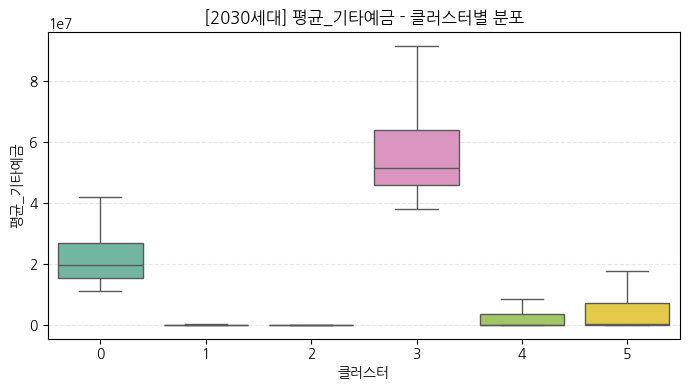


📊 [2030세대] 평균_비이자상품 - 클러스터별 유의성 분석
🔎 정규성: ❌ X | 등분산성: ❌ X

📊 평균_비이자상품 - Kruskal-Wallis 결과
→ 통계량: 4352.5595, p-value: 0.0000
✅ 클러스터 간 유의미한 차이가 있습니다.

📊 사후분석 (Dunn’s Test, Bonferroni 조정):
🔹 p-value Matrix:
               0              1              2              3              4  \
0   1.000000e+00   0.000000e+00  1.190870e-165   1.703465e-53   2.699556e-63   
1   0.000000e+00   1.000000e+00   9.932530e-10  4.806819e-309  5.370034e-189   
2  1.190870e-165   9.932530e-10   1.000000e+00  1.562011e-220   6.824675e-41   
3   1.703465e-53  4.806819e-309  1.562011e-220   1.000000e+00  8.278392e-142   
4   2.699556e-63  5.370034e-189   6.824675e-41  8.278392e-142   1.000000e+00   
5   4.591401e-05   9.277903e-59   3.079360e-32   2.775580e-56   1.944685e-05   

              5  
0  4.591401e-05  
1  9.277903e-59  
2  3.079360e-32  
3  2.775580e-56  
4  1.944685e-05  
5  1.000000e+00  

🔹 유의미한 차이 여부 (p < 0.05):
       0      1      2      3      4      5
0  False   True   True   True   True  

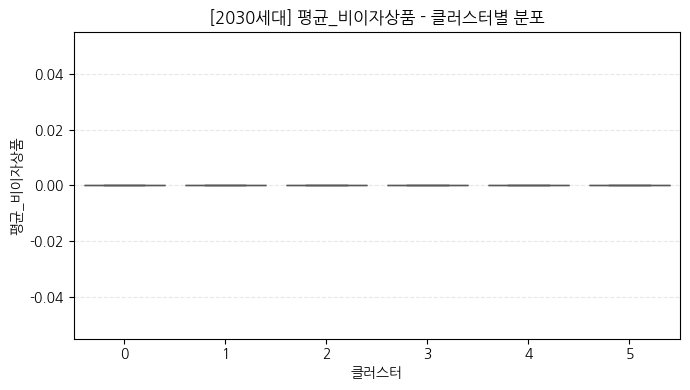


📊 [2030세대] 평균_카드 - 클러스터별 유의성 분석
🔎 정규성: ❌ X | 등분산성: ❌ X

📊 평균_카드 - Kruskal-Wallis 결과
→ 통계량: 17377.7121, p-value: 0.0000
✅ 클러스터 간 유의미한 차이가 있습니다.

📊 사후분석 (Dunn’s Test, Bonferroni 조정):
🔹 p-value Matrix:
              0              1              2              3             4  \
0  1.000000e+00   0.000000e+00   0.000000e+00   1.418081e-01  1.629683e-22   
1  0.000000e+00   1.000000e+00   1.000000e+00  6.756490e-258  0.000000e+00   
2  0.000000e+00   1.000000e+00   1.000000e+00  1.523067e-220  0.000000e+00   
3  1.418081e-01  6.756490e-258  1.523067e-220   1.000000e+00  7.205148e-02   
4  1.629683e-22   0.000000e+00   0.000000e+00   7.205148e-02  1.000000e+00   
5  1.890535e-11   0.000000e+00  1.363880e-305   1.091678e-02  1.000000e+00   

               5  
0   1.890535e-11  
1   0.000000e+00  
2  1.363880e-305  
3   1.091678e-02  
4   1.000000e+00  
5   1.000000e+00  

🔹 유의미한 차이 여부 (p < 0.05):
       0      1      2      3      4      5
0  False   True   True  False   True   True
1   Tr

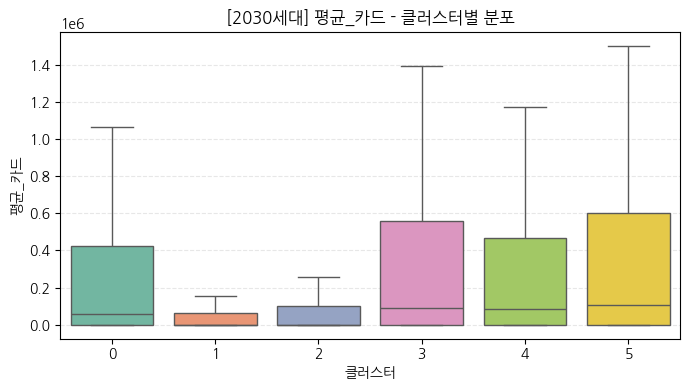


📊 [2030세대] 평균_대출 - 클러스터별 유의성 분석
🔎 정규성: ❌ X | 등분산성: ❌ X

📊 평균_대출 - Kruskal-Wallis 결과
→ 통계량: 64095.1194, p-value: 0.0000
✅ 클러스터 간 유의미한 차이가 있습니다.

📊 사후분석 (Dunn’s Test, Bonferroni 조정):
🔹 p-value Matrix:
              0              1    2              3             4             5
0  1.000000e+00   0.000000e+00  0.0   1.000000e+00  1.254174e-20  7.310055e-04
1  0.000000e+00   1.000000e+00  0.0  7.980182e-122  0.000000e+00  2.191130e-93
2  0.000000e+00   0.000000e+00  1.0   0.000000e+00  0.000000e+00  0.000000e+00
3  1.000000e+00  7.980182e-122  0.0   1.000000e+00  1.718462e-05  7.569207e-02
4  1.254174e-20   0.000000e+00  0.0   1.718462e-05  1.000000e+00  1.000000e+00
5  7.310055e-04   2.191130e-93  0.0   7.569207e-02  1.000000e+00  1.000000e+00

🔹 유의미한 차이 여부 (p < 0.05):
       0      1      2      3      4      5
0  False   True   True  False   True   True
1   True  False   True   True   True   True
2   True   True  False   True   True   True
3  False   True   True  False   True  False
4

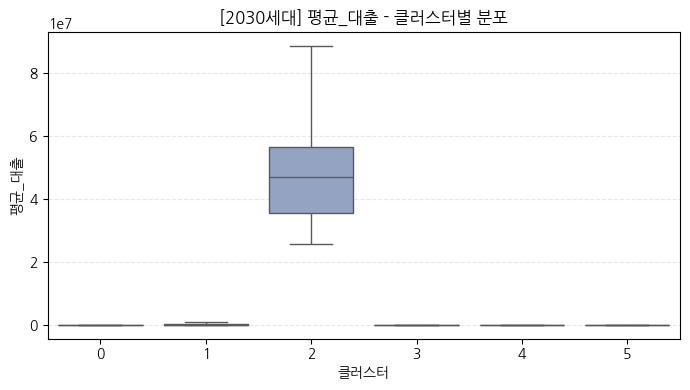


📊 [2030세대] 평균_총점수 - 클러스터별 유의성 분석
🔎 정규성: ❌ X | 등분산성: ❌ X

📊 평균_총점수 - Kruskal-Wallis 결과
→ 통계량: 114912.1143, p-value: 0.0000
✅ 클러스터 간 유의미한 차이가 있습니다.

📊 사후분석 (Dunn’s Test, Bonferroni 조정):
🔹 p-value Matrix:
               0    1              2             3              4  \
0   1.000000e+00  0.0  3.354001e-237  1.259086e-21   1.000000e+00   
1   0.000000e+00  1.0   0.000000e+00  0.000000e+00   0.000000e+00   
2  3.354001e-237  0.0   1.000000e+00  6.661851e-20  2.022164e-270   
3   1.259086e-21  0.0   6.661851e-20  1.000000e+00   4.313244e-19   
4   1.000000e+00  0.0  2.022164e-270  4.313244e-19   1.000000e+00   
5   2.485782e-35  0.0   2.942187e-12  9.565745e-01   1.324820e-32   

              5  
0  2.485782e-35  
1  0.000000e+00  
2  2.942187e-12  
3  9.565745e-01  
4  1.324820e-32  
5  1.000000e+00  

🔹 유의미한 차이 여부 (p < 0.05):
       0      1      2      3      4      5
0  False   True   True   True  False   True
1   True  False   True   True   True   True
2   True   True  False   True

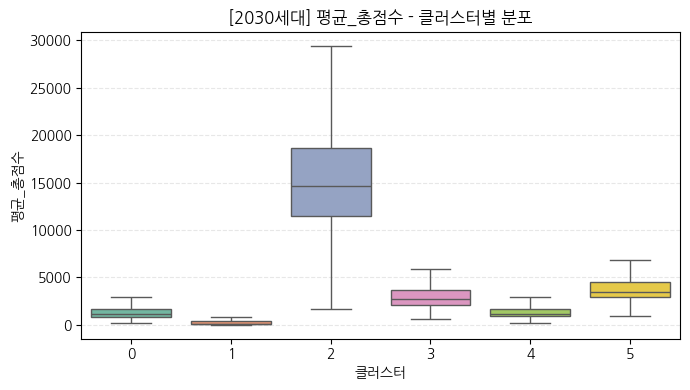


📊 [2030세대] 거래기간(개월) - 클러스터별 유의성 분석
🔎 정규성: ❌ X | 등분산성: ❌ X

📊 거래기간(개월) - Kruskal-Wallis 결과
→ 통계량: 17484.8381, p-value: 0.0000
✅ 클러스터 간 유의미한 차이가 있습니다.

📊 사후분석 (Dunn’s Test, Bonferroni 조정):
🔹 p-value Matrix:
              0             1    2              3              4             5
0  1.000000e+00  0.000000e+00  0.0   4.575709e-86   1.330107e-04  9.738809e-11
1  0.000000e+00  1.000000e+00  0.0   2.540894e-01   0.000000e+00  1.638167e-35
2  0.000000e+00  0.000000e+00  1.0   0.000000e+00   0.000000e+00  0.000000e+00
3  4.575709e-86  2.540894e-01  0.0   1.000000e+00  1.353553e-115  1.376501e-24
4  1.330107e-04  0.000000e+00  0.0  1.353553e-115   1.000000e+00  5.310382e-21
5  9.738809e-11  1.638167e-35  0.0   1.376501e-24   5.310382e-21  1.000000e+00

🔹 유의미한 차이 여부 (p < 0.05):
       0      1      2      3      4      5
0  False   True   True   True   True   True
1   True  False   True  False   True   True
2   True   True  False   True   True   True
3   True  False   True  False   True   

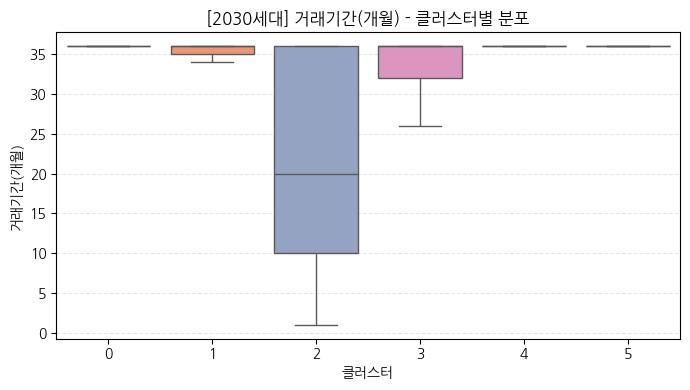


📊 [2030세대] 최대_보유상품종류 - 클러스터별 유의성 분석
🔎 정규성: ❌ X | 등분산성: ❌ X

📊 최대_보유상품종류 - Kruskal-Wallis 결과
→ 통계량: 37764.8293, p-value: 0.0000
✅ 클러스터 간 유의미한 차이가 있습니다.

📊 사후분석 (Dunn’s Test, Bonferroni 조정):
🔹 p-value Matrix:
               0    1             2              3              4  \
0   1.000000e+00  0.0  0.000000e+00   1.000000e+00   0.000000e+00   
1   0.000000e+00  1.0  0.000000e+00   0.000000e+00   0.000000e+00   
2   0.000000e+00  0.0  1.000000e+00   0.000000e+00   9.723117e-90   
3   1.000000e+00  0.0  0.000000e+00   1.000000e+00  1.503355e-233   
4   0.000000e+00  0.0  9.723117e-90  1.503355e-233   1.000000e+00   
5  4.486308e-179  0.0  1.137610e-52  3.940978e-103   5.047950e-05   

               5  
0  4.486308e-179  
1   0.000000e+00  
2   1.137610e-52  
3  3.940978e-103  
4   5.047950e-05  
5   1.000000e+00  

🔹 유의미한 차이 여부 (p < 0.05):
       0      1      2      3      4      5
0  False   True   True  False   True   True
1   True  False   True   True   True   True
2   True   True  

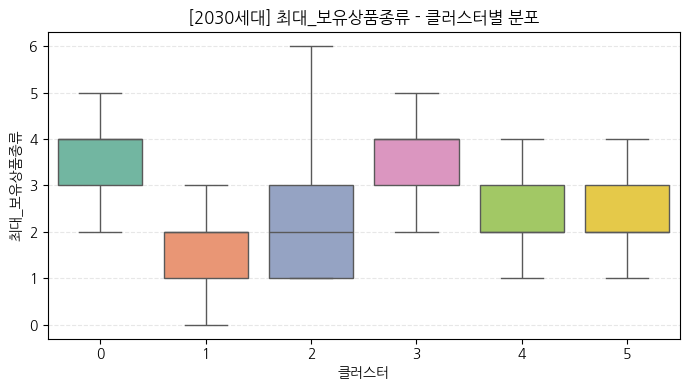


📊 [2030세대] 평균_보유상품종류 - 클러스터별 유의성 분석
🔎 정규성: ❌ X | 등분산성: ❌ X

📊 평균_보유상품종류 - Kruskal-Wallis 결과
→ 통계량: 50923.1698, p-value: 0.0000
✅ 클러스터 간 유의미한 차이가 있습니다.

📊 사후분석 (Dunn’s Test, Bonferroni 조정):
🔹 p-value Matrix:
              0    1              2              3              4  \
0  1.000000e+00  0.0   0.000000e+00   2.027821e-12   0.000000e+00   
1  0.000000e+00  1.0   0.000000e+00   0.000000e+00   0.000000e+00   
2  0.000000e+00  0.0   1.000000e+00  2.159436e-234   4.129794e-20   
3  2.027821e-12  0.0  2.159436e-234   1.000000e+00  6.975135e-180   
4  0.000000e+00  0.0   4.129794e-20  6.975135e-180   1.000000e+00   
5  5.285715e-56  0.0   1.539320e-23   3.528900e-72   1.690138e-06   

              5  
0  5.285715e-56  
1  0.000000e+00  
2  1.539320e-23  
3  3.528900e-72  
4  1.690138e-06  
5  1.000000e+00  

🔹 유의미한 차이 여부 (p < 0.05):
       0      1      2      3      4      5
0  False   True   True   True   True   True
1   True  False   True   True   True   True
2   True   True  False  

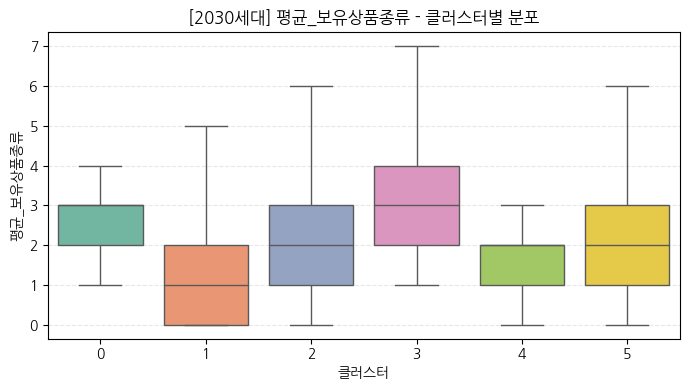

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal, shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp
import warnings
warnings.filterwarnings('ignore')

# ✅ 변수 리스트
features = [
    "평균_입출금예금", "평균_기타예금", "평균_비이자상품", 
    "평균_카드", "평균_대출", "평균_총점수", "거래기간(개월)",
    "최대_보유상품종류", "평균_보유상품종류"
]

cluster_col = "KMeans_DB_거리기반"

# ✅ 분석 반복
for feature in features:
    print("\n" + "=" * 70)
    print(f"📊 [2030세대] {feature} - 클러스터별 유의성 분석")
    print("=" * 70)

    # ------------------------------
    # ✅ 클러스터별 그룹 데이터
    group_values = [group[feature].dropna().values for name, group in df_2030.groupby(cluster_col)]

    # ✅ 정규성 + 등분산성 체크
    normal = all(shapiro(g)[1] > 0.05 for g in group_values)
    equal_var = levene(*group_values)[1] > 0.05

    print(f"🔎 정규성: {'✅ 충족' if normal else '❌ X'} | 등분산성: {'✅ 충족' if equal_var else '❌ X'}")

    # ------------------------------
    # ✅ 유의성 검정
    if normal and equal_var:
        stat, p = f_oneway(*group_values)
        test_name = "ANOVA"
    else:
        stat, p = kruskal(*group_values)
        test_name = "Kruskal-Wallis"

    print(f"\n📊 {feature} - {test_name} 결과")
    print(f"→ 통계량: {stat:.4f}, p-value: {p:.4f}")

    if p < 0.05:
        print("✅ 클러스터 간 유의미한 차이가 있습니다.")

        # ✅ 사후분석
        if test_name == "ANOVA":
            print("\n🔍 사후분석 (Tukey HSD):")
            tukey_result = pairwise_tukeyhsd(endog=df_2030[feature], groups=df_2030[cluster_col], alpha=0.05)
            tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
            tukey_df["유의미한 차이"] = tukey_df["p-adj"] < 0.05  # True/False 추가
            print(tukey_df)
        else:
            print("\n📊 사후분석 (Dunn’s Test, Bonferroni 조정):")
            dunn_result = sp.posthoc_dunn(df_2030, val_col=feature, group_col=cluster_col, p_adjust='bonferroni')
            dunn_bool = dunn_result < 0.05  # True/False 추가
            print("🔹 p-value Matrix:")
            print(dunn_result)
            print("\n🔹 유의미한 차이 여부 (p < 0.05):")
            print(dunn_bool)

    else:
        print("⚠️ 클러스터 간 유의미한 차이가 없습니다.")

    print("-" * 70)

    # ------------------------------
    # ✅ 박스플롯 시각화
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df_2030, x=cluster_col, y=feature, palette="Set2", showfliers=False)
    plt.title(f"[2030세대] {feature} - 클러스터별 분포")
    plt.xlabel("클러스터")
    plt.ylabel(feature)
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

## 클러스터내 2030 비율 등..

In [50]:
summary_df_2030 = df_2030.groupby("연령대").agg({
    "고객ID": "count",  # 고객 수 (고객ID를 count로 대체)
    "평균_입출금예금": "mean",
    "평균_기타예금": "mean",
    "평균_비이자상품": "mean",
    "평균_카드": "mean",
    "평균_대출": "mean",
    "평균_총점수": "mean",
    "거래기간(개월)": "mean",
    "최대_보유상품종류": "mean",
    "평균_보유상품종류": "mean"
}).rename(columns={"고객ID": "고객수"}).reset_index()  # 🔹 인덱스를 해제하여 '연령대'를 컬럼으로 복구

# 연령대와 평균 보유상품종류를 반올림 및 정수형 변환
summary_df_2030["연령대"] = summary_df_2030["연령대"].round(0).astype("int8")
summary_df_2030["평균_보유상품종류"] = summary_df_2030["평균_보유상품종류"].round(0).astype("int8")

In [51]:
summary_df_2030

,연령대,고객수,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출,평균_총점수,거래기간(개월),최대_보유상품종류,평균_보유상품종류
0,20,298266,8.788421e+05,1.097136e+06,57761.325796,103915.923926,1.069662e+06,497.900145,30.240959,1.851978,1
1,30,301233,1.887208e+06,1.577643e+06,73591.945692,133046.244737,3.123793e+06,1315.325047,31.100650,1.862253,1


shape: (6, 4)
┌────────────────────┬─────────────┬─────────────┬──────────────┐
│ KMeans_DB_거리기반 ┆ 전체_고객수 ┆ 2030_고객수 ┆ 2030_비율(%) │
│ ---                ┆ ---         ┆ ---         ┆ ---          │
│ i64                ┆ u32         ┆ u32         ┆ f64          │
╞════════════════════╪═════════════╪═════════════╪══════════════╡
│ 5                  ┆ 26586       ┆ 2897        ┆ 10.9         │
│ 4                  ┆ 156487      ┆ 20723       ┆ 13.24        │
│ 0                  ┆ 82990       ┆ 12443       ┆ 14.99        │
│ 1                  ┆ 1619255     ┆ 547467      ┆ 33.81        │
│ 2                  ┆ 61942       ┆ 13324       ┆ 21.51        │
│ 3                  ┆ 31433       ┆ 2645        ┆ 8.41         │
└────────────────────┴─────────────┴─────────────┴──────────────┘


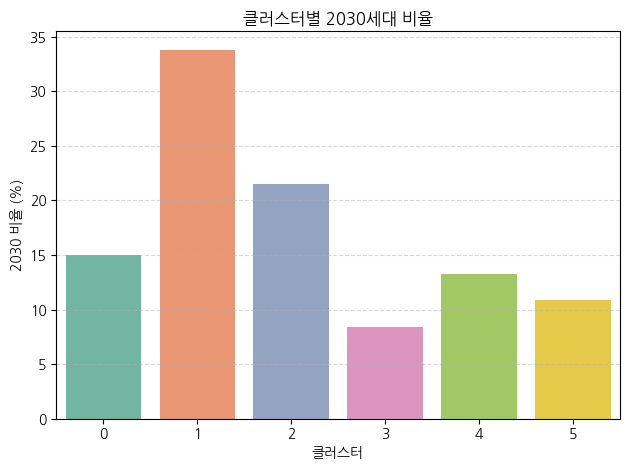

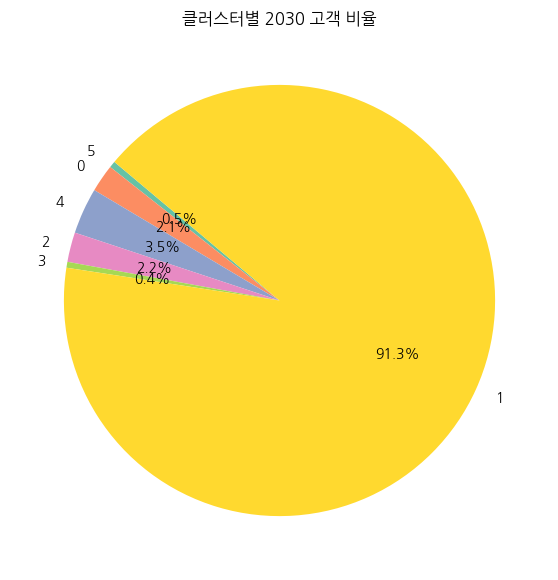

<Figure size 800x500 with 0 Axes>

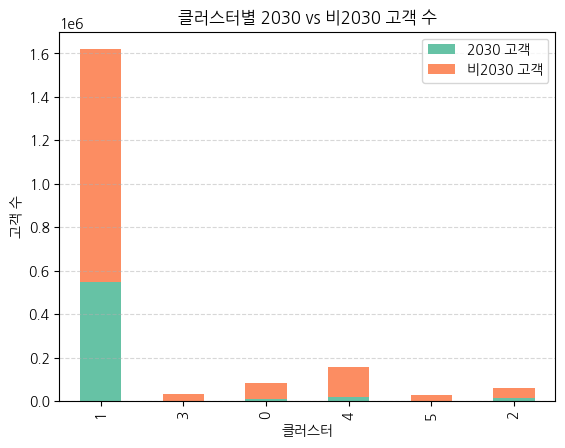

<Figure size 800x500 with 0 Axes>

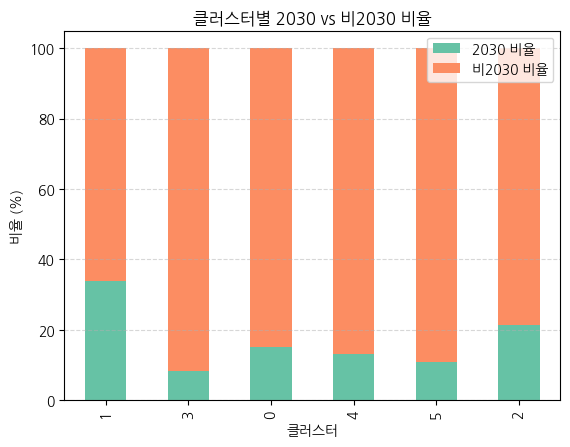

In [55]:
# 2030세대 여부 파생변수 추가
df_2030 = customer_agg_kmeans_db_거리_6.with_columns(
    ((pl.col("연령대") >= 20) & (pl.col("연령대") < 40)).alias("is_2030")
)

# 클러스터별 2030 비율 계산
cluster_2030 = df_2030.group_by("KMeans_DB_거리기반").agg([
    pl.count().alias("전체_고객수"),
    pl.col("is_2030").sum().alias("2030_고객수")
]).with_columns(
    (pl.col("2030_고객수") / pl.col("전체_고객수") * 100).round(2).alias("2030_비율(%)")
)

print(cluster_2030)

# 시각화
sns.barplot(
    data=cluster_2030.to_pandas(),
    x="KMeans_DB_거리기반", y="2030_비율(%)", palette="Set2"
)
plt.title("클러스터별 2030세대 비율")
plt.xlabel("클러스터")
plt.ylabel("2030 비율 (%)")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 2030 고객만 필터링
df_2030_only = df_2030.filter(pl.col("is_2030"))

# 클러스터별 2030 고객 수
cluster_2030_pie = df_2030_only.group_by("KMeans_DB_거리기반").agg(
    pl.count().alias("2030_고객수")
).to_pandas()

# 원그래프 그리기
plt.figure(figsize=(7, 7))
plt.pie(cluster_2030_pie["2030_고객수"], 
        labels=cluster_2030_pie["KMeans_DB_거리기반"], 
        autopct="%1.1f%%", colors=sns.color_palette("Set2"),
        startangle=140)
plt.title("클러스터별 2030 고객 비율")
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

# 전체 고객수 및 2030 고객수 계산
cluster_2030 = df_2030.group_by("KMeans_DB_거리기반").agg([
    pl.count().alias("전체_고객수"),
    pl.col("is_2030").sum().alias("2030_고객수")
])

# 비2030 고객수 계산
cluster_2030 = cluster_2030.with_columns(
    (pl.col("전체_고객수") - pl.col("2030_고객수")).alias("비2030_고객수")
).to_pandas()

# 시각화 (누적 막대그래프)
plt.figure(figsize=(8, 5))
cluster_2030.set_index("KMeans_DB_거리기반")[["2030_고객수", "비2030_고객수"]].plot(
    kind="bar", stacked=True, color=["#66c2a5", "#fc8d62"]
)
plt.title("클러스터별 2030 vs 비2030 고객 수")
plt.xlabel("클러스터")
plt.ylabel("고객 수")
plt.legend(["2030 고객", "비2030 고객"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


# 2030 비율 계산
cluster_2030 = cluster_2030.assign(
    비2030_비율=(cluster_2030["비2030_고객수"] / cluster_2030["전체_고객수"]) * 100,
    비율_2030=(cluster_2030["2030_고객수"] / cluster_2030["전체_고객수"]) * 100 
)

# 시각화 (비율 막대그래프)
plt.figure(figsize=(8, 5))
cluster_2030.set_index("KMeans_DB_거리기반")[["비율_2030", "비2030_비율"]].plot(
    kind="bar", stacked=True, color=["#66c2a5", "#fc8d62"]
)
plt.title("클러스터별 2030 vs 비2030 비율")
plt.xlabel("클러스터")
plt.ylabel("비율 (%)")
plt.legend(["2030 비율", "비2030 비율"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


In [56]:
customer_agg_kmeans_db_거리_6.columns

['고객ID',
 '평균_입출금예금',
 '평균_기타예금',
 '평균_비이자상품',
 '평균_카드',
 '평균_대출',
 '평균_총점수',
 '거래기간(개월)',
 '연령대',
 '최대_보유상품종류',
 '평균_보유상품종류',
 'KMeans_DB_거리기반']

In [57]:
import scipy.stats as stats

# 분석 변수 목록
variables = ["평균_입출금예금", "평균_기타예금", "평균_비이자상품", "평균_대출", "평균_카드", "평균_총점수", "거래기간(개월)", "연령대", "최대_보유상품종류", "평균_보유상품종류"]

# 클러스터 리스트
clusters = sorted(customer_agg_kmeans_db_거리_6["KMeans_DB_거리기반"].unique())

# 각 클러스터에 대해 상관계수 계산
for c in clusters:
    df_c = customer_agg_kmeans_db_거리_6.filter(pl.col("KMeans_DB_거리기반") == c).to_pandas()
    print(f"\n🔹 클러스터 {c} 상관계수:")
    corr = df_c[variables].corr(method="pearson")
    display(corr.style.background_gradient(cmap='Pastel1').format(precision=2))



🔹 클러스터 0 상관계수:


,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_대출,평균_카드,평균_총점수,거래기간(개월),연령대,최대_보유상품종류,평균_보유상품종류
평균_입출금예금,1.00,0.13,0.08,0.05,0.17,0.45,0.10,0.13,0.28,0.27
평균_기타예금,0.13,1.00,0.01,0.00,0.01,0.28,-0.08,0.10,0.03,0.13
평균_비이자상품,0.08,0.01,1.00,0.04,0.09,0.23,-0.01,-0.01,0.20,0.19
평균_대출,0.05,0.00,0.04,1.00,0.14,0.85,-0.01,-0.02,0.22,0.19
평균_카드,0.17,0.01,0.09,0.14,1.00,0.26,0.06,-0.08,0.40,0.43
평균_총점수,0.45,0.28,0.23,0.85,0.26,1.00,0.05,0.05,0.36,0.35
거래기간(개월),0.10,-0.08,-0.01,-0.01,0.06,0.05,1.00,0.07,0.25,0.19
연령대,0.13,0.10,-0.01,-0.02,-0.08,0.05,0.07,1.00,0.01,0.03
최대_보유상품종류,0.28,0.03,0.20,0.22,0.40,0.36,0.25,0.01,1.00,0.83
평균_보유상품종류,0.27,0.13,0.19,0.19,0.43,0.35,0.19,0.03,0.83,1.00



🔹 클러스터 1 상관계수:


,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_대출,평균_카드,평균_총점수,거래기간(개월),연령대,최대_보유상품종류,평균_보유상품종류
평균_입출금예금,1.00,0.15,0.04,0.00,0.21,0.13,0.18,0.24,0.27,0.37
평균_기타예금,0.15,1.00,0.03,-0.04,0.08,0.04,0.10,0.01,0.42,0.37
평균_비이자상품,0.04,0.03,1.00,-0.00,0.02,0.06,0.01,0.01,0.09,0.10
평균_대출,0.00,-0.04,-0.00,1.00,0.07,0.96,-0.22,0.01,0.23,0.21
평균_카드,0.21,0.08,0.02,0.07,1.00,0.15,0.10,0.04,0.38,0.45
평균_총점수,0.13,0.04,0.06,0.96,0.15,1.00,-0.09,0.05,0.31,0.30
거래기간(개월),0.18,0.10,0.01,-0.22,0.10,-0.09,1.00,0.19,0.06,0.02
연령대,0.24,0.01,0.01,0.01,0.04,0.05,0.19,1.00,0.02,0.09
최대_보유상품종류,0.27,0.42,0.09,0.23,0.38,0.31,0.06,0.02,1.00,0.73
평균_보유상품종류,0.37,0.37,0.10,0.21,0.45,0.30,0.02,0.09,0.73,1.00



🔹 클러스터 2 상관계수:


,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_대출,평균_카드,평균_총점수,거래기간(개월),연령대,최대_보유상품종류,평균_보유상품종류
평균_입출금예금,1.00,0.22,0.09,0.12,0.26,0.23,0.12,0.16,0.35,0.38
평균_기타예금,0.22,1.00,0.11,0.11,0.10,0.18,0.08,0.11,0.41,0.41
평균_비이자상품,0.09,0.11,1.00,0.03,0.10,0.06,0.01,0.03,0.18,0.19
평균_대출,0.12,0.11,0.03,1.00,0.05,0.76,-0.17,0.08,0.04,0.12
평균_카드,0.26,0.10,0.10,0.05,1.00,0.16,0.17,0.08,0.38,0.44
평균_총점수,0.23,0.18,0.06,0.76,0.16,1.00,0.40,0.21,0.32,0.34
거래기간(개월),0.12,0.08,0.01,-0.17,0.17,0.40,1.00,0.25,0.48,0.39
연령대,0.16,0.11,0.03,0.08,0.08,0.21,0.25,1.00,0.24,0.25
최대_보유상품종류,0.35,0.41,0.18,0.04,0.38,0.32,0.48,0.24,1.00,0.88
평균_보유상품종류,0.38,0.41,0.19,0.12,0.44,0.34,0.39,0.25,0.88,1.00



🔹 클러스터 3 상관계수:


,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_대출,평균_카드,평균_총점수,거래기간(개월),연령대,최대_보유상품종류,평균_보유상품종류
평균_입출금예금,1.00,0.18,0.12,0.06,0.22,0.45,-0.14,0.04,0.26,0.28
평균_기타예금,0.18,1.00,0.07,0.06,0.09,0.33,-0.28,-0.01,0.16,0.21
평균_비이자상품,0.12,0.07,1.00,0.04,0.14,0.22,-0.07,-0.04,0.24,0.24
평균_대출,0.06,0.06,0.04,1.00,0.15,0.81,-0.05,-0.03,0.19,0.18
평균_카드,0.22,0.09,0.14,0.15,1.00,0.28,0.00,-0.11,0.41,0.46
평균_총점수,0.45,0.33,0.22,0.81,0.28,1.00,-0.03,-0.01,0.37,0.37
거래기간(개월),-0.14,-0.28,-0.07,-0.05,0.00,-0.03,1.00,0.08,0.21,0.14
연령대,0.04,-0.01,-0.04,-0.03,-0.11,-0.01,0.08,1.00,-0.03,-0.02
최대_보유상품종류,0.26,0.16,0.24,0.19,0.41,0.37,0.21,-0.03,1.00,0.89
평균_보유상품종류,0.28,0.21,0.24,0.18,0.46,0.37,0.14,-0.02,0.89,1.00



🔹 클러스터 4 상관계수:


,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_대출,평균_카드,평균_총점수,거래기간(개월),연령대,최대_보유상품종류,평균_보유상품종류
평균_입출금예금,1.00,0.03,0.00,0.00,0.06,0.26,-0.04,0.01,-0.01,0.00
평균_기타예금,0.03,1.00,0.04,-0.02,0.04,0.08,0.01,0.03,0.55,0.46
평균_비이자상품,0.00,0.04,1.00,0.02,0.03,0.16,-0.06,0.01,0.18,0.19
평균_대출,0.00,-0.02,0.02,1.00,0.13,0.92,-0.16,-0.03,0.27,0.28
평균_카드,0.06,0.04,0.03,0.13,1.00,0.21,-0.03,-0.04,0.29,0.40
평균_총점수,0.26,0.08,0.16,0.92,0.21,1.00,-0.07,-0.01,0.34,0.37
거래기간(개월),-0.04,0.01,-0.06,-0.16,-0.03,-0.07,1.00,0.05,-0.02,-0.02
연령대,0.01,0.03,0.01,-0.03,-0.04,-0.01,0.05,1.00,0.01,0.01
최대_보유상품종류,-0.01,0.55,0.18,0.27,0.29,0.34,-0.02,0.01,1.00,0.82
평균_보유상품종류,0.00,0.46,0.19,0.28,0.40,0.37,-0.02,0.01,0.82,1.00



🔹 클러스터 5 상관계수:


,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_대출,평균_카드,평균_총점수,거래기간(개월),연령대,최대_보유상품종류,평균_보유상품종류
평균_입출금예금,1.00,0.10,0.05,0.05,0.06,0.39,-0.37,0.03,0.00,0.07
평균_기타예금,0.10,1.00,0.08,-0.02,0.03,0.16,-0.09,0.06,0.50,0.46
평균_비이자상품,0.05,0.08,1.00,0.01,0.03,0.16,-0.13,0.03,0.24,0.26
평균_대출,0.05,-0.02,0.01,1.00,0.14,0.85,-0.10,-0.02,0.24,0.27
평균_카드,0.06,0.03,0.03,0.14,1.00,0.20,-0.09,-0.00,0.25,0.33
평균_총점수,0.39,0.16,0.16,0.85,0.20,1.00,-0.09,0.01,0.33,0.37
거래기간(개월),-0.37,-0.09,-0.13,-0.10,-0.09,-0.09,1.00,-0.02,-0.03,-0.09
연령대,0.03,0.06,0.03,-0.02,-0.00,0.01,-0.02,1.00,0.05,0.05
최대_보유상품종류,0.00,0.50,0.24,0.24,0.25,0.33,-0.03,0.05,1.00,0.86
평균_보유상품종류,0.07,0.46,0.26,0.27,0.33,0.37,-0.09,0.05,0.86,1.00
